### Import des bibliothèques

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Chargement des données brutes

In [31]:
clients = pd.read_csv("../data/processed/clients_cleaned.csv")
# catalogue = pd.read_csv("../data/raw/Catalogue.csv")
# immatriculations = pd.read_csv("../data/raw/immatriculations_small.csv")
# marketing = pd.read_csv("../data/raw/Marketing.csv")

# Analyse exploratoire pour les clients

In [32]:
# Statistiques descriptives
print("Statistiques descriptives:")
clients.describe(include='all')

Statistiques descriptives:


,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
count,100000.000000,100000,100000.000000,100000,100000.000000,100000,100000
unique,NaN,2,NaN,4,NaN,2,99989
top,NaN,M,NaN,En Couple,NaN,False,835 JQ 59
freq,NaN,70001,NaN,64174,NaN,87065,2
mean,43.729990,NaN,607.630170,NaN,1.244660,NaN,NaN
std,18.337916,NaN,335.974983,NaN,1.387278,NaN,NaN
min,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,NaN
25%,28.000000,NaN,420.000000,NaN,0.000000,NaN,NaN
50%,42.000000,NaN,520.000000,NaN,1.000000,NaN,NaN
75%,57.000000,NaN,826.000000,NaN,2.000000,NaN,NaN


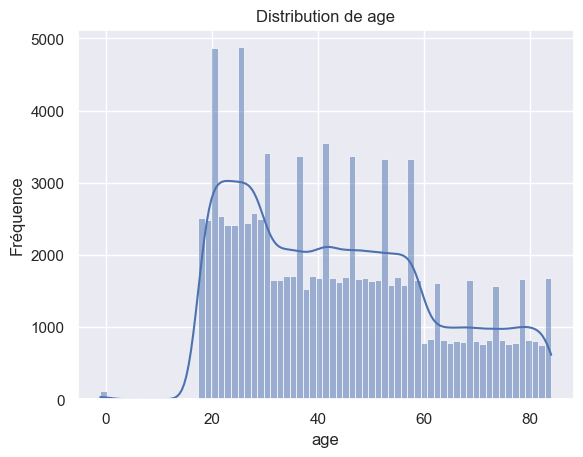

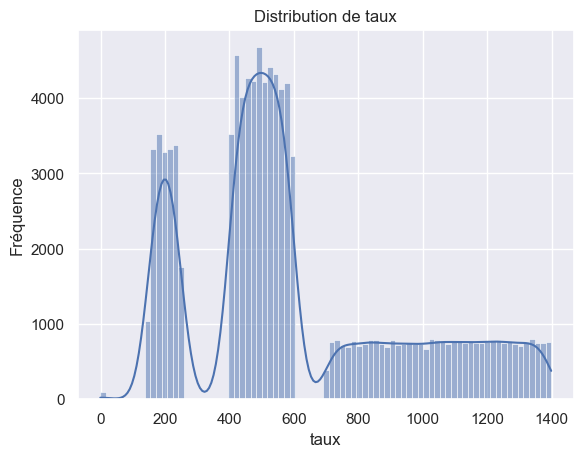

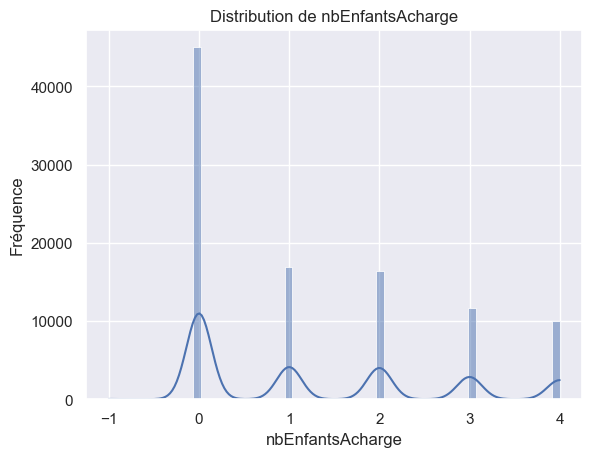

In [33]:
# Histogrammes pour les variables numériques
num_cols = clients.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(clients[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

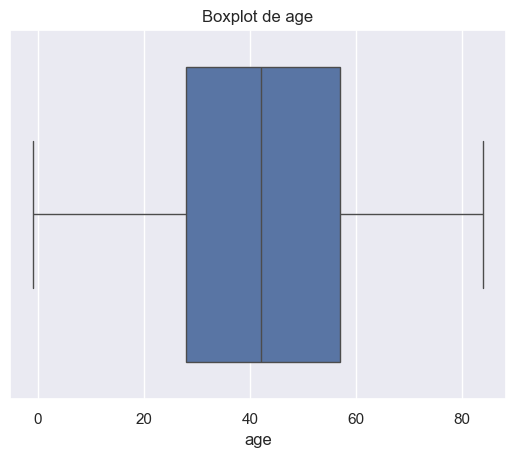

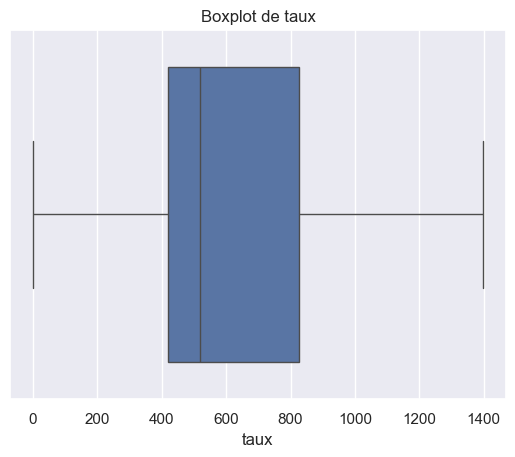

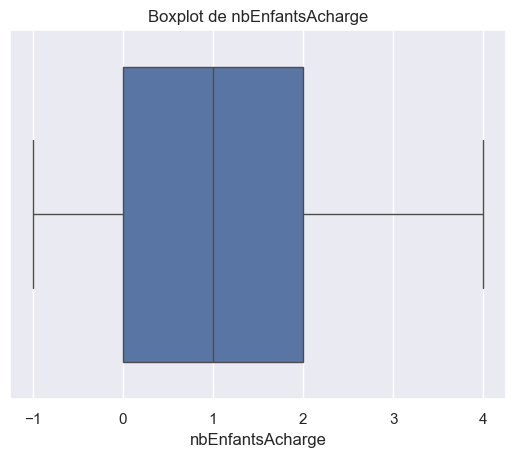

In [34]:
# Boxplots pour détecter les outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=clients[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [35]:
# Initialisation d'un dictionnaire pour stocker les pourcentages
percentages_out_of_bounds = {}

# Définir les contraintes
constraints = {
    'age': (18, 84),
    'taux': (544, 74185),
    'nbEnfantsAcharge': (0, 4)
}

# Calculer le pourcentage des valeurs hors des contraintes pour chaque colonne
for col, (min_val, max_val) in constraints.items():
    total_values = len(clients)
    out_of_bounds = clients[(clients[col] < min_val) | (clients[col] > max_val)]
    percentage = (len(out_of_bounds) / total_values) * 100
    percentages_out_of_bounds[col] = percentage

# Afficher les résultats
for col, percentage in percentages_out_of_bounds.items():
    print(f"Pourcentage des valeurs hors des contraintes pour '{col}': {percentage:.2f}%")
##

Pourcentage des valeurs hors des contraintes pour 'age': 0.11%
Pourcentage des valeurs hors des contraintes pour 'taux': 55.82%
Pourcentage des valeurs hors des contraintes pour 'nbEnfantsAcharge': 0.11%


In [36]:
#Supprimer les lignes concernées si elles sont insignifiantes par rapport à l'ensemble des données.
clients = clients[(clients['age'] >= 18) & (clients['age'] <= 84)]

In [37]:
valid_taux = clients[(clients['taux'] >= 544) & (clients['taux'] <= 74185)]['taux']
mean_taux = valid_taux.mean()
clients['taux'] = clients['taux'].apply(lambda x: mean_taux if x < 544 or x > 74185 else x)

In [38]:
clients = clients[(clients['nbEnfantsAcharge'] >= 0) & (clients['nbEnfantsAcharge'] <= 4)]

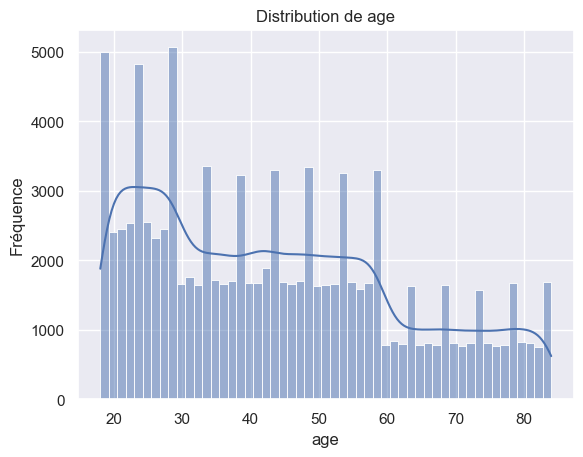

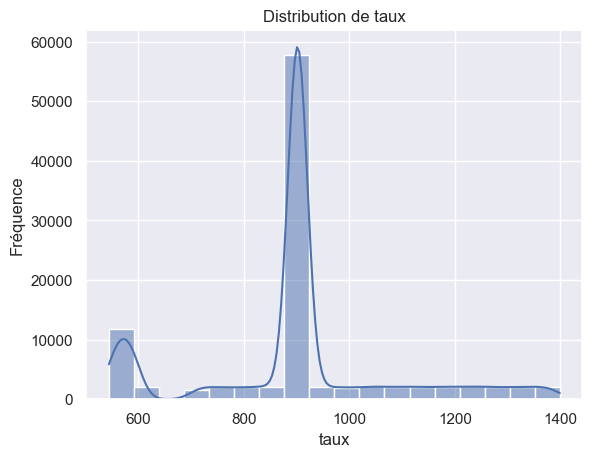

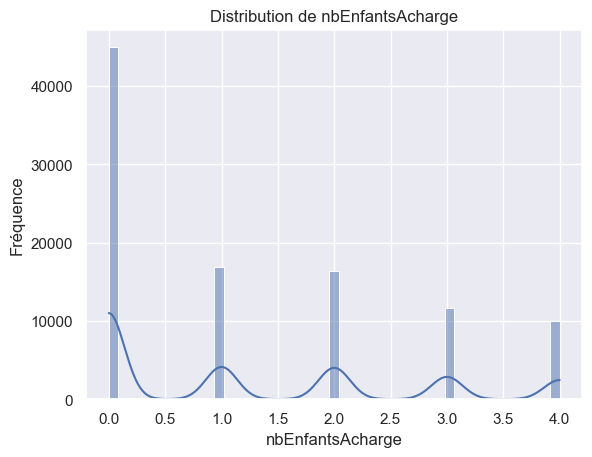

In [39]:
# Histogrammes pour les variables numériques
num_cols = clients.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(clients[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

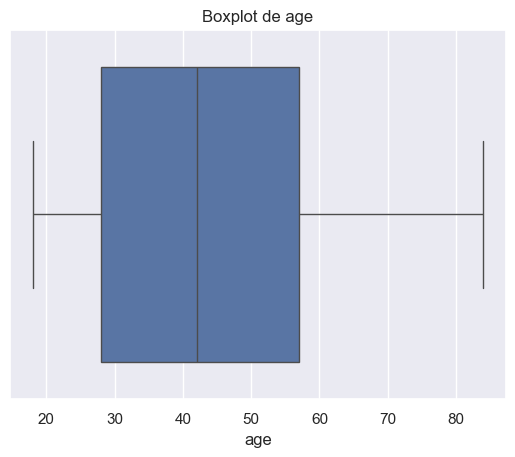

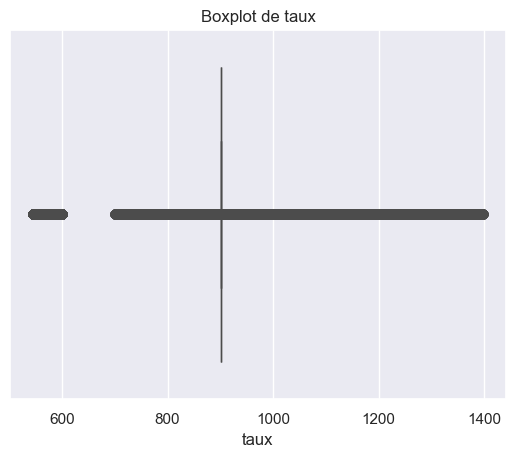

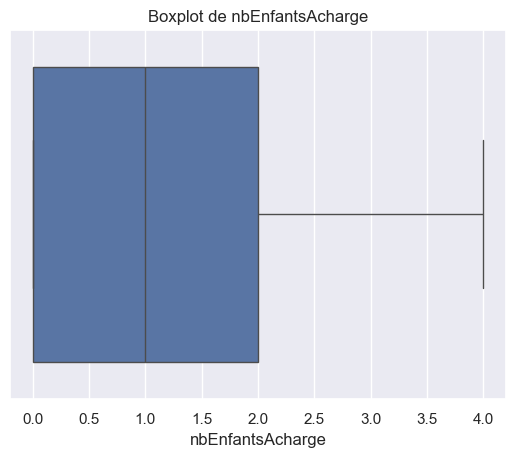

In [40]:
# Boxplots pour détecter les outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=clients[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

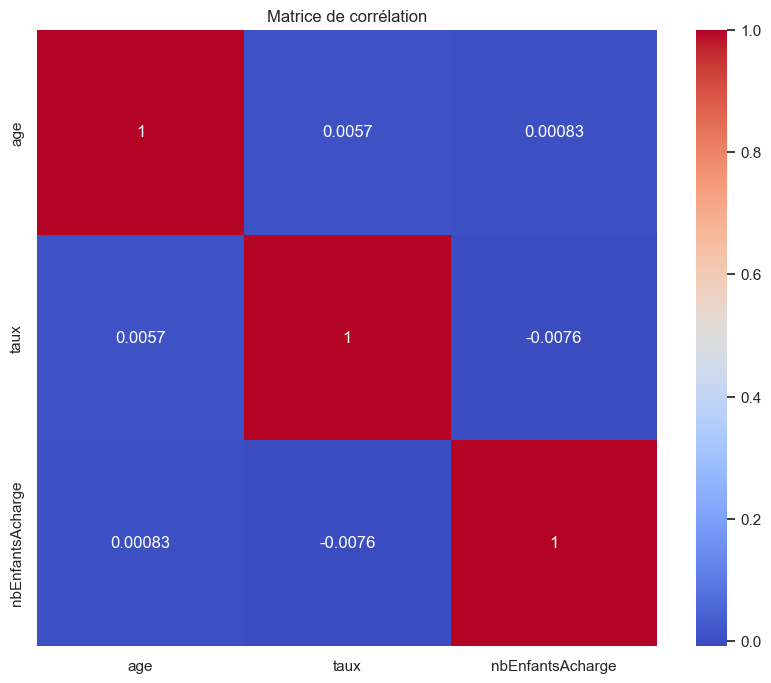

In [41]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(clients[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

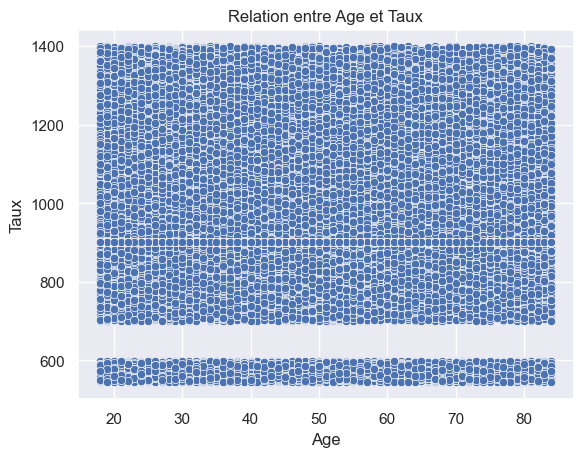

In [42]:
# Nuages de points pour explorer les relations entre les variables
if 'age' in clients.columns and 'taux' in clients.columns:
    plt.figure()
    sns.scatterplot(x=clients['age'], y=clients['taux'])
    plt.title('Relation entre Age et Taux')
    plt.xlabel('Age')
    plt.ylabel('Taux')
    plt.show()

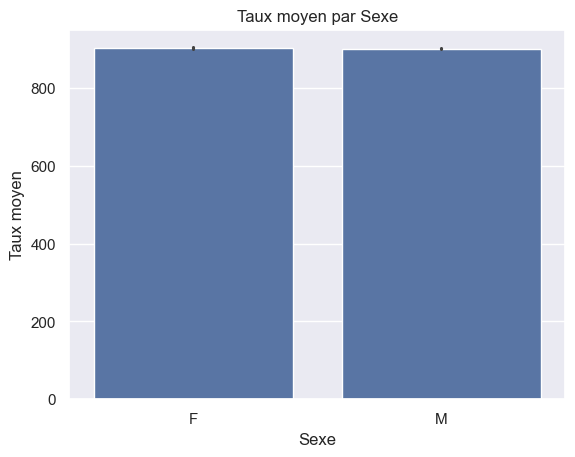

In [43]:
# Analyse des variables catégoriques
if 'sexe' in clients.columns and 'taux' in clients.columns:
    plt.figure()
    sns.barplot(x='sexe', y='taux', data=clients)
    plt.title('Taux moyen par Sexe')
    plt.xlabel('Sexe')
    plt.ylabel('Taux moyen')
    plt.show()

In [44]:
clients.describe()

,age,taux,nbEnfantsAcharge
count,99783.000000,99783.000000,99783.000000
mean,43.779181,901.657448,1.247046
std,18.288575,184.780983,1.386109
min,18.000000,544.000000,0.000000
25%,28.000000,901.666908,0.000000
50%,42.000000,901.666908,1.000000
75%,57.000000,901.666908,2.000000
max,84.000000,1399.000000,4.000000


In [45]:
# J'utilise le dataframe clients
clients.to_csv('../data/processed/clients_processed.csv', index=False)
print("\nDonnées nettoyées sauvegardées dans 'clients_processed.csv'")


Données nettoyées sauvegardées dans 'clients_processed.csv'
